In [4]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from keras.models import load_model
 
#ラベルを作る
LABELS = ["hiphop", "punkrock", "techno"]
#保存したモデル
model = load_model('/Users/ryosimon/Documents/CCLab/fashsionSorting/fashsionSortingTest2/fashsion_model_1')
 
def check_jeanne(url):
    # 対象画像のインポート&
    img = Image.open(url)
    img = img.convert("RGB")
    # img = img.resize((256, 256))
    img = img.resize((150, 150))
    plt.imshow(img)
    plt.show()
    x = np.asarray(img)
    # x = x.reshape(-1, 255, 256, 3)
    x = x.reshape(-1, 150, 150, 3)
    x = x / 255
 
    # 予測
    pre = model.predict(x)
    #確率の一番高いインデックス番号を取得
    idx = np.argmax(pre, axis=1)[0]
    #一番高い確率をパーセンテージで取得
    per = int(pre[0][idx] * 100)
     
    return (idx, per, img)
 
def check_jeanne_result(url):
    idx, per, img = check_jeanne(url)
    #答えを表示
    print("この写真は、", LABELS[idx])
    print(per, "%の可能性で合っているだろう")

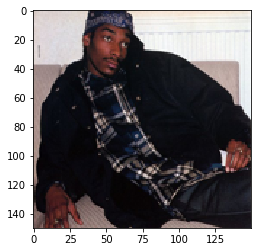

この写真は、 hiphop
79 %の可能性で合っているだろう


In [7]:
check_jeanne_result('/Users/ryosimon/Documents/CCLab/fashsionSorting/fashsionSortingTest2/test/hiphop/hiphop.230.jpg')